# NAO Technical Assessment

## NAME: Jesubukade Emmanuel Ajakaye
### ***ajakaye.bukade@gmail.com     |   (+44)07884489099***

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import dataframe_image as dfi
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

### Data Preprocessing
- Importing Data worksheet
- Creating end of the year as last day of data aggregation as date
- setting date as index of table
- Showing top rows

In [2]:
def data_wrangling(filename, sheet_name):
    """
    This function completes basic preprocessing on the file and returns
    dataframe ready dataframe for model analysis.
    
    Args:
        filename(str): Name of excel file with extention e.g filename.xlsx
        sheet_name(str): Name of the sheet the dataset is on
    
    Return:
        data(dataframe): This function returns a pandas dataframe
    """

    try:
        data = pd.read_excel(filename, sheet_name) # import file
        date = pd.to_datetime({'year': data["Year"],
                               'month': [12] * len(data["Year"]),
                               'day': [31] * len(data["Year"])},
                               format="%Y") # set as last day of the year
        data.set_index(date, inplace=True) # set date as index

        return data
    
    except Exception as ex:
        return f"The following error occured: {ex}"
    
data = data_wrangling("Dataset.xlsx", "Sheet1")
data.head()

,Year,"Agriculture, forestry and fishing",Mining and quarrying,Manufacturing,"Electricity, gas, steam and air conditioning supply","Water supply; sewerage, waste management and remediation activities",Construction,Wholesale and retail trade; repair of motor vehicles and motorcycles,Transport and storage,Accommodation and food services,...,Public administration and defence; compulsory social security,Education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers,Consumer expenditure [note 4],Consumer expenditure - Not travel,Consumer expenditure - Travel,Total greenhouse gas emissions
1990-12-31,1990,55690.3,50452.8,175212.7,217602.2,75316.3,8201.2,11560.8,66985.3,3015.3,...,12058.4,6421.4,6059.8,1717.0,966.0,100.9,143742.1,83111.6,60630.4,842320.1
1991-12-31,1991,55492.6,50608.3,176254.4,214317.5,76852.7,8072.0,11984.1,67438.6,3453.5,...,11381.2,6740.7,6386.3,1816.6,1014.1,83.3,152223.6,91987.3,60236.3,851881.6
1992-12-31,1992,55149.0,51199.3,169388.2,202469.2,76959.1,8188.3,11789.9,68438.5,3163.4,...,11523.4,6867.6,6746.9,1640.3,970.7,83.5,150566.9,89330.2,61236.7,832675.6
1993-12-31,1993,54319.9,50807.1,164365.0,184997.2,77275.6,8275.1,12032.9,69735.2,3371.4,...,11710.9,5966.1,6431.4,1721.5,1013.0,84.5,155345.9,93635.0,61710.9,815077.2
1994-12-31,1994,55129.7,44588.4,167285.9,180721.6,77637.9,8633.8,12403.1,70659.2,3342.3,...,11071.3,5438.4,6517.7,1664.2,1004.7,88.4,150151.8,89243.6,60908.2,804149.2


### Explorative Data Analysis

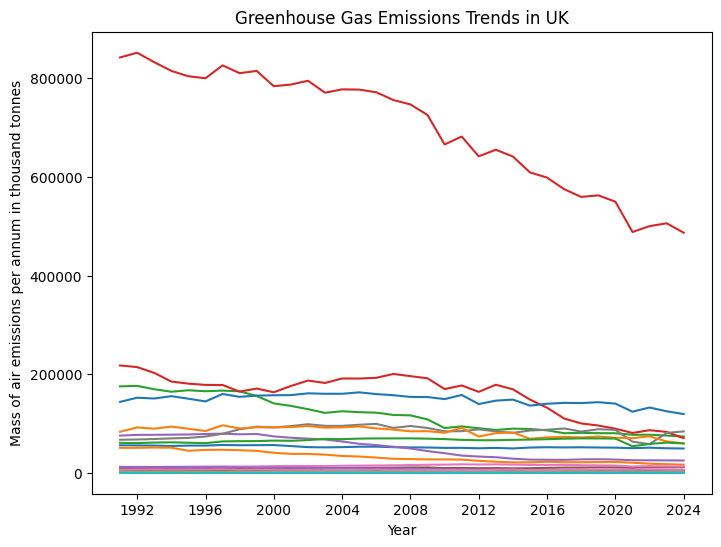

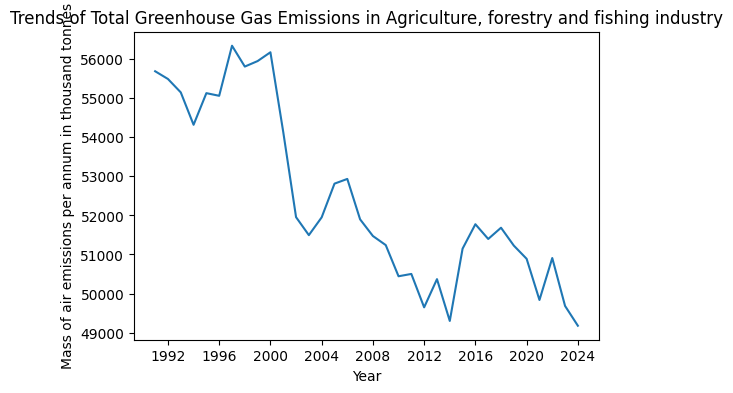

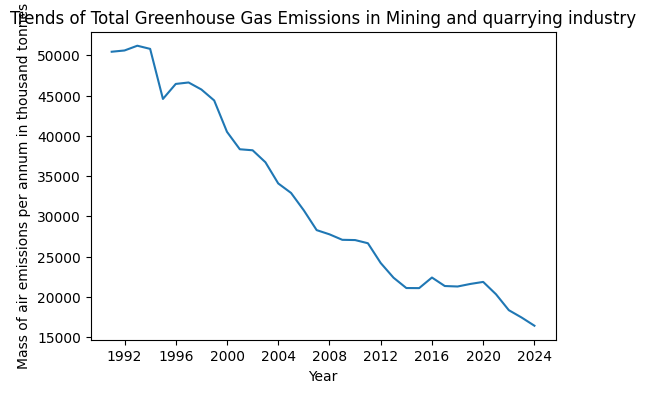

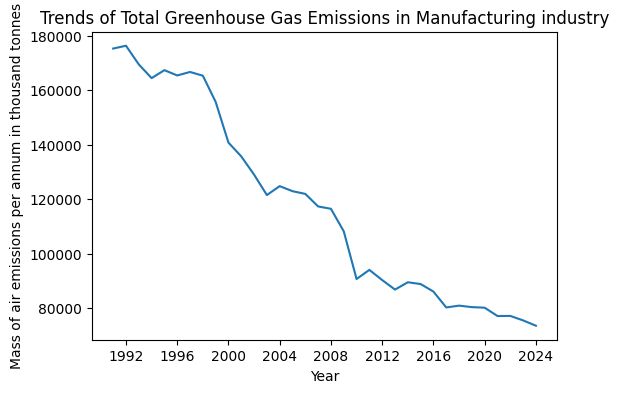

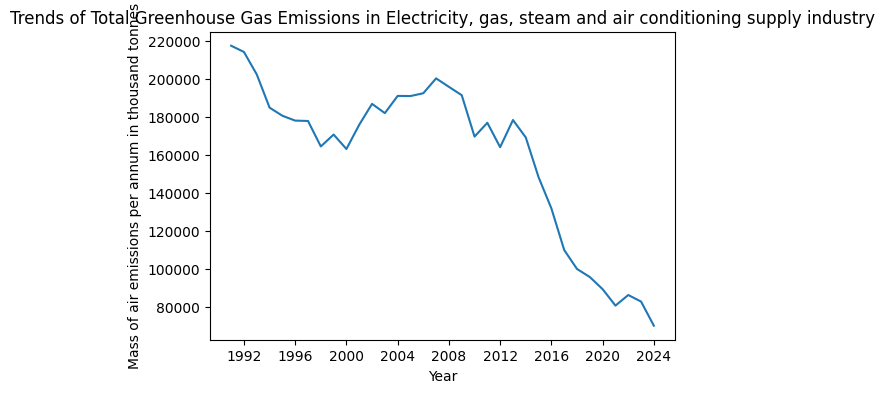

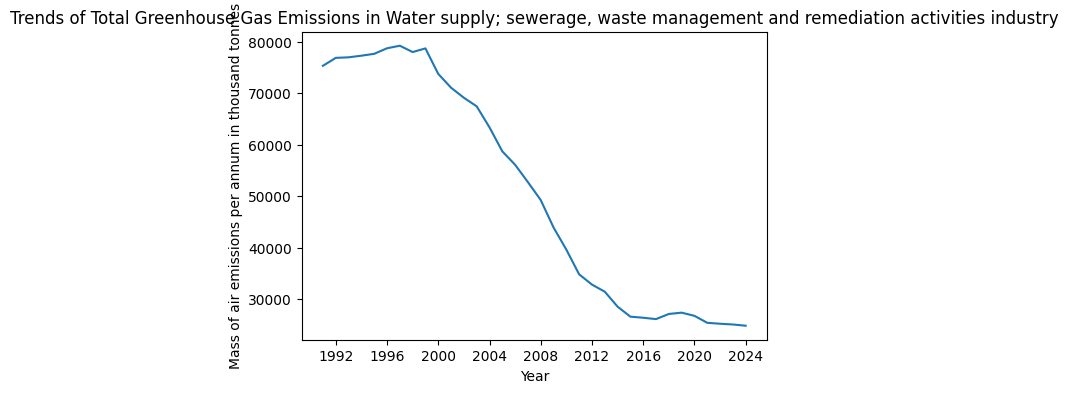

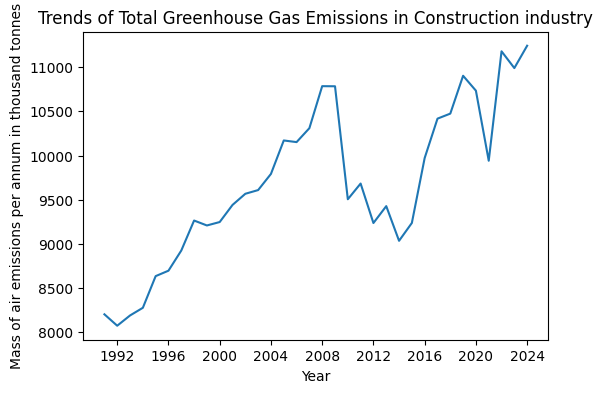

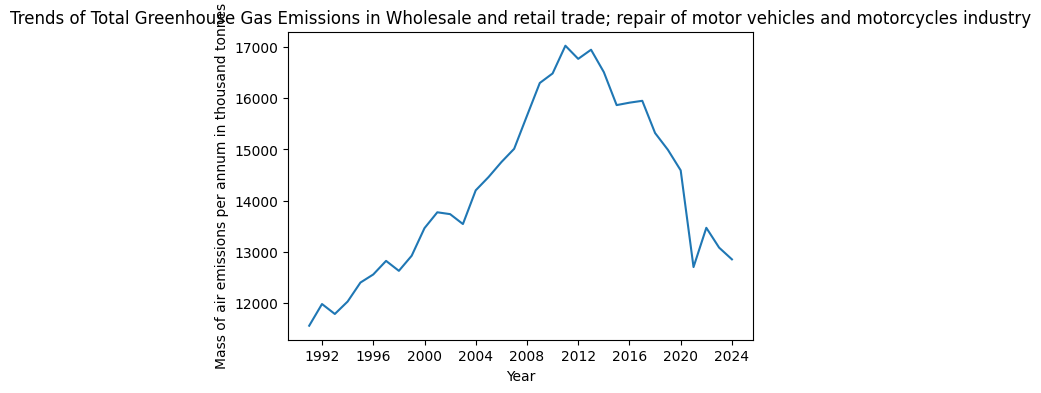

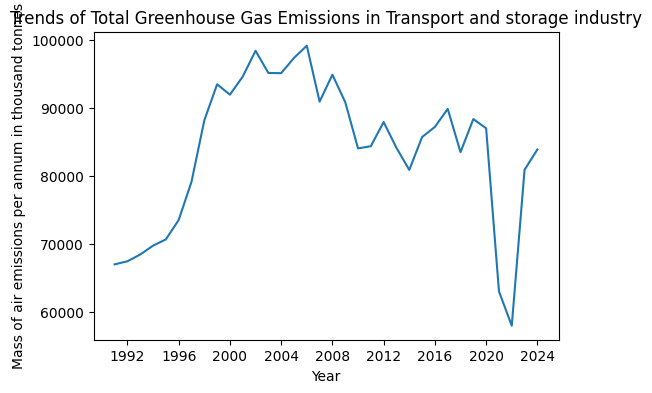

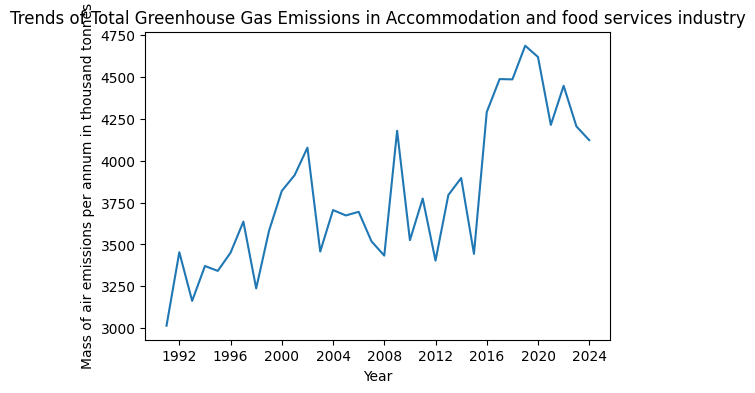

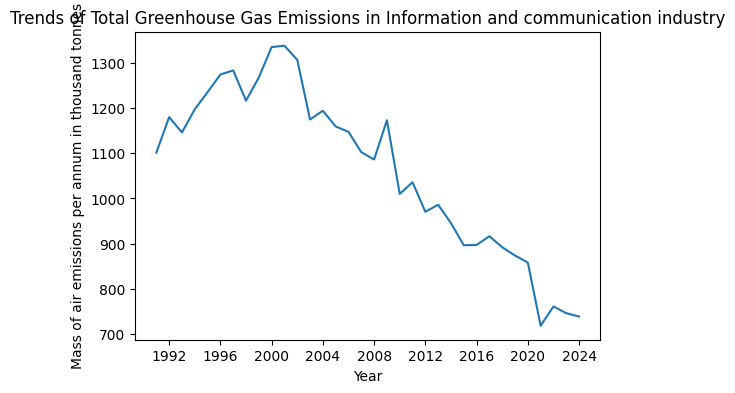

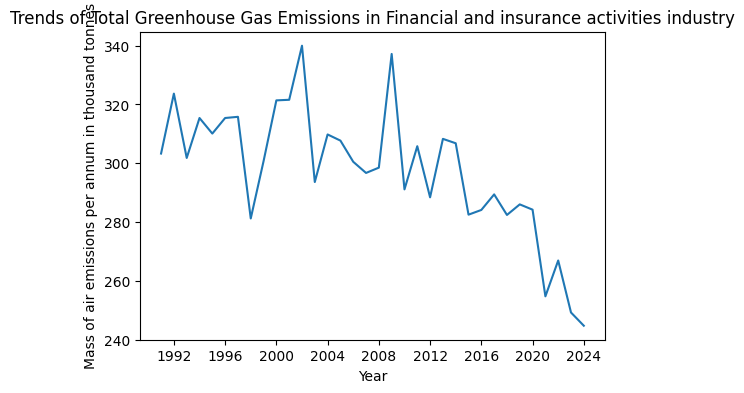

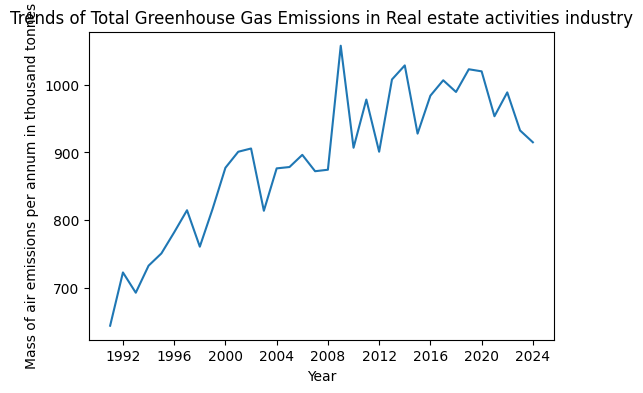

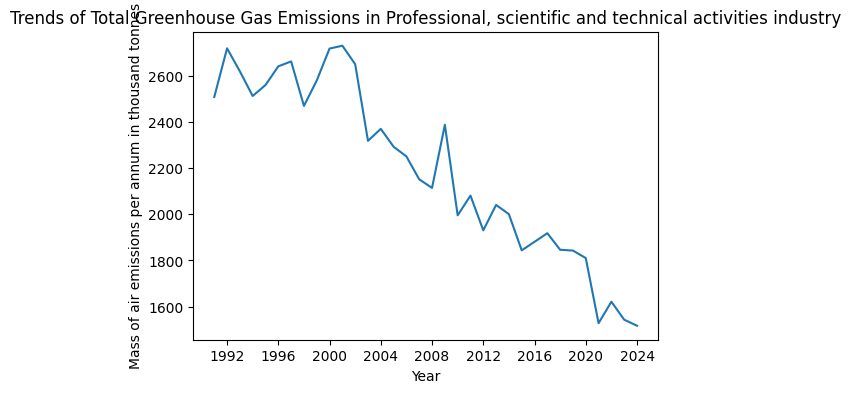

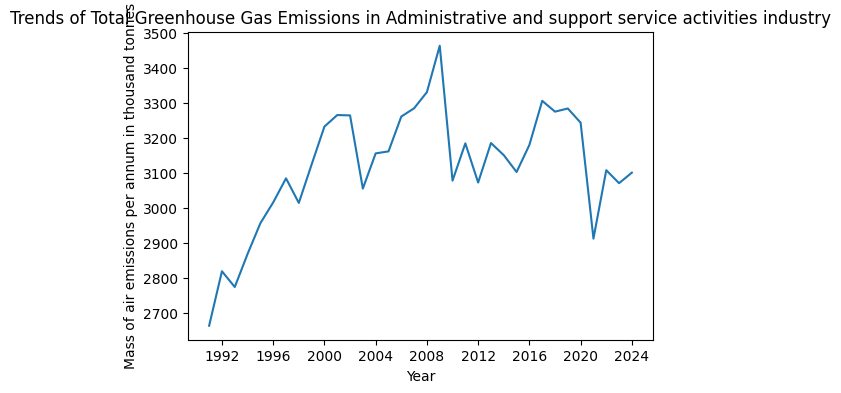

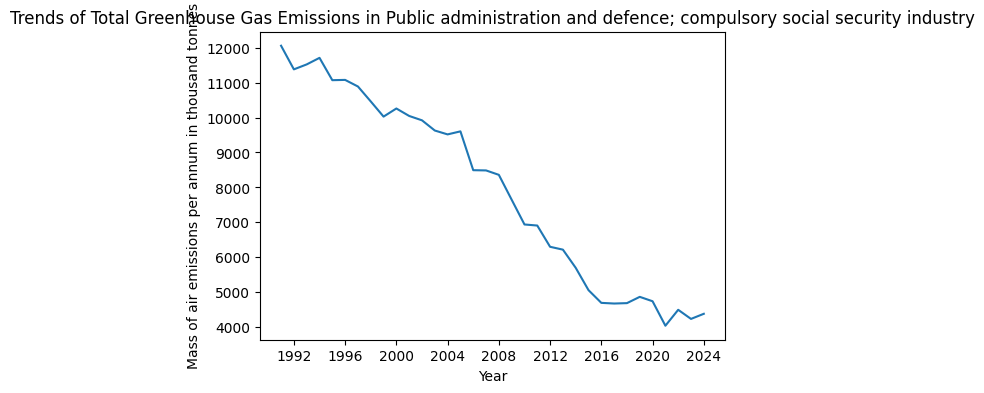

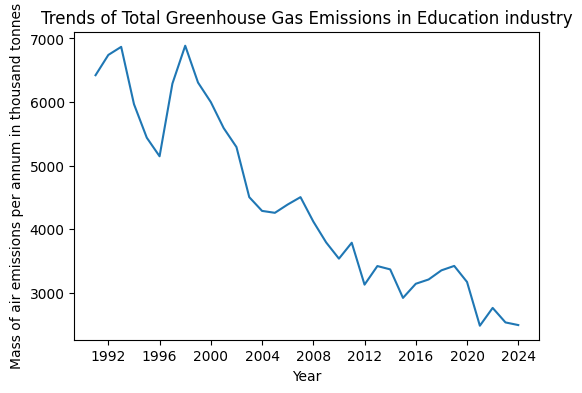

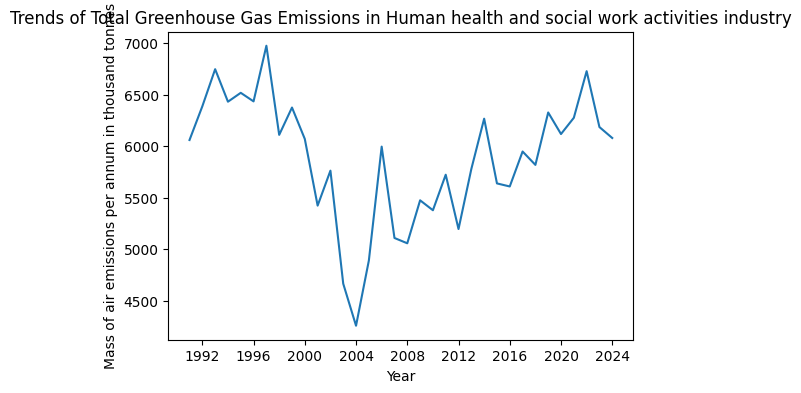

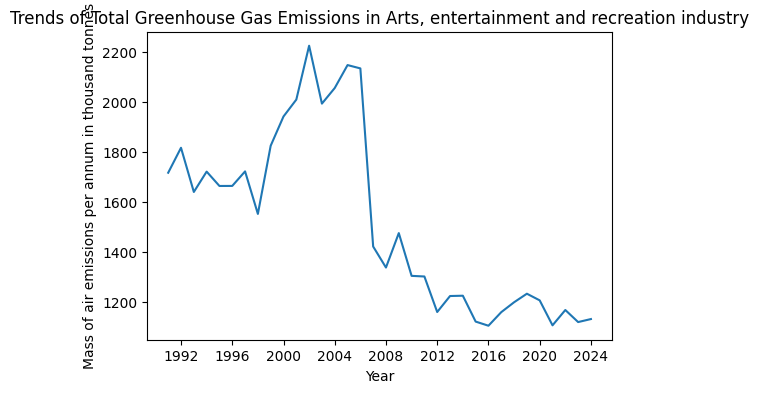

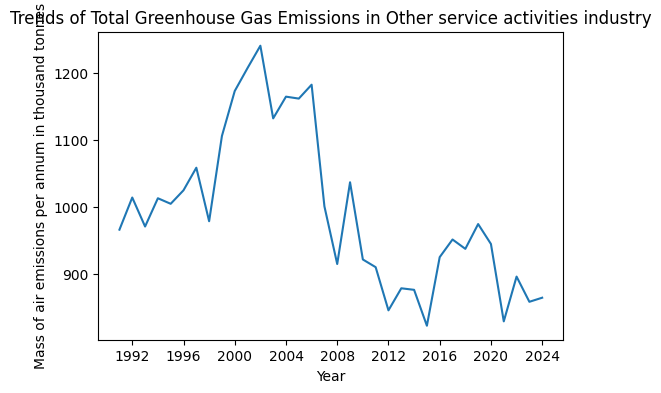

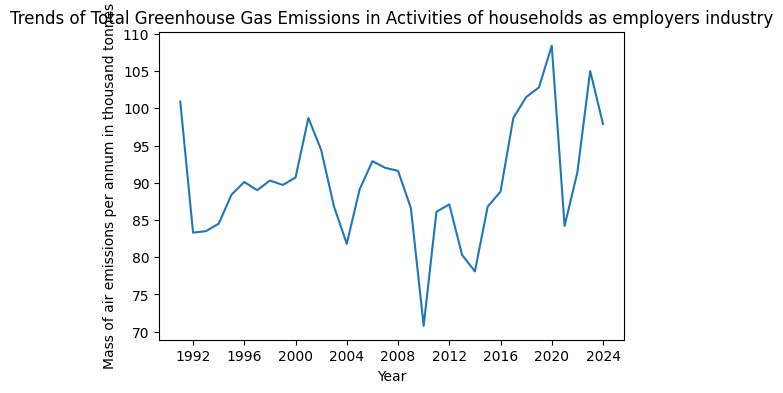

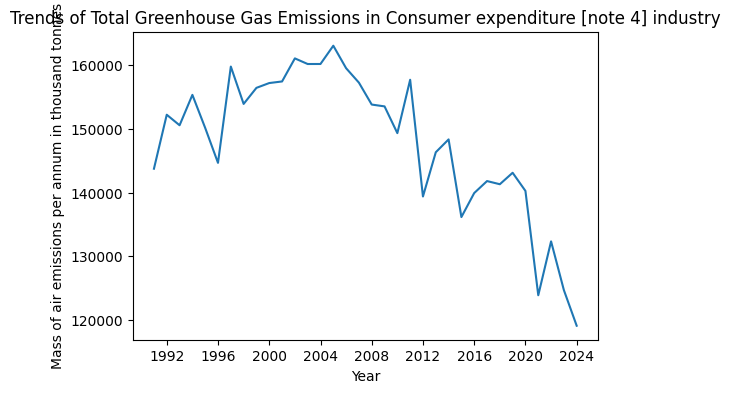

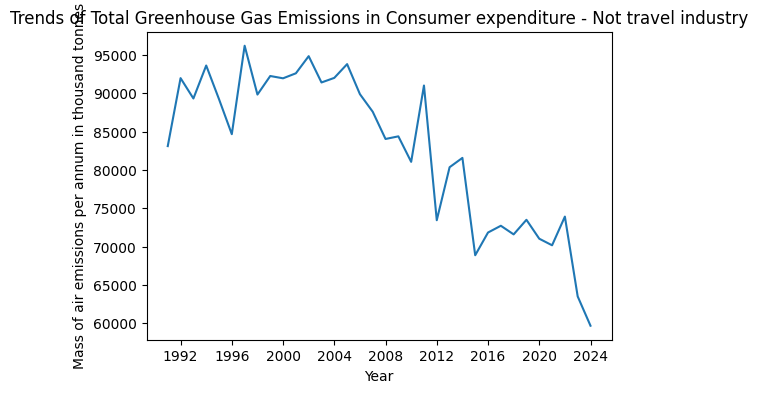

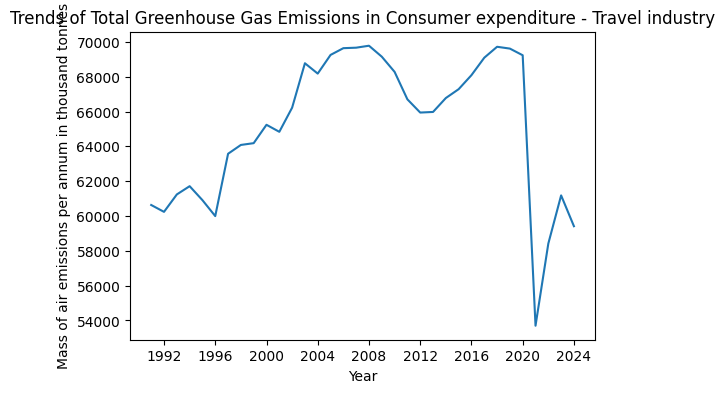

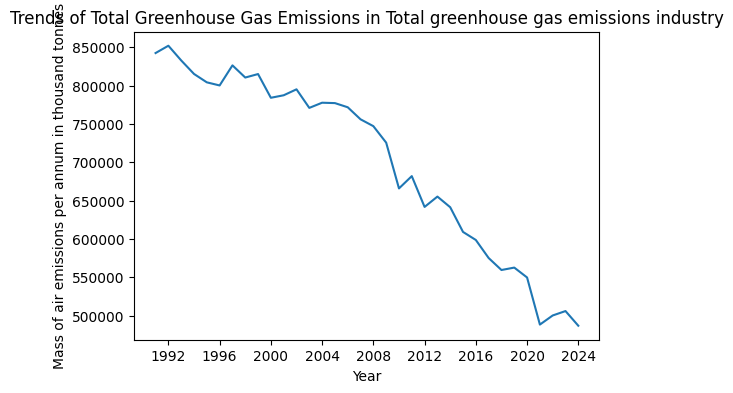

In [3]:
data_col = data.columns[data.columns != "Year"]
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(data.index, data[data_col])

ax.set_title("Greenhouse Gas Emissions Trends in UK")
ax.set_xlabel("Year")
ax.set_ylabel("Mass of air emissions per annum in thousand tonnes")

plt.show()

for col in data_col:
    fig, ax = plt.subplots(figsize=(6,4))

    ax.plot(data.index, data[col])

    ax.set_title(f"Trends of Total Greenhouse Gas Emissions in {col} industry")
    ax.set_xlabel("Year")
    ax.set_ylabel("Mass of air emissions per annum in thousand tonnes")

    plt.show()

## Investigating Change in greenhouse gas (GHG) over Time
### Model Building: Kendall Tau Statistics

In [4]:
def tau_model(data):
    """
    This function performs the Kendall Tau Statistics on dataset.

    Args:
        data(dataframe): imported dataset for model analysis

    Return:
        tau_result_df(dataframe): pandas dataframe of model values (tau, pvalue)
    """
    try:
        tau_result = {}
        data_col = data.columns[data.columns != "Year"] # Getting the column names in the dataset except year

        X = data["Year"].values.reshape(-1, 1) # Extract the time series values and reshape them
        for col in data_col:
            y = data[col].values.reshape(-1, 1) # Extract the variable values and reshape

            tau, pvalue = stats.kendalltau(X, y) # Initializing and Fitting Kendall Tau to the data

            tau_result[col] = (tau, pvalue) # Appending variable and model value to dictionary
            tau_result_df = pd.DataFrame(tau_result, index=["tau", "pvalue"]).T # Converting Dictionary to Dataframe

        return(tau_result_df)
    
    except Exception as ex:
        return f"The following error occured: {ex}"

#### Visualising Kendall Tau Result on Table
***Colours adding to be more informative***

In [5]:
tau_model_result = tau_model(data)

alpha = 0.01 # Threshold set to check if a signifant trend exist in series at 99%

def colour_significant(value):
    """Function to check and add background colour based on threshold.

    Args:
        value: subset(column) which checks will be performed on
    
    Return:
        background colour for value
    """
    if value < alpha:
        color = 'green'
    else:
        color = 'red'
    return 'background-color: %s' % color

# Displaying Kendall Tau Model Dataframe
tau_model_result_styled = tau_model_result.style.map(colour_significant, subset='pvalue')\
    .bar(subset = 'tau', align='mid', color=['green', 'red'])

tau_model_result_styled.export_png('tau_model_result_styled.png') # Save table to image
tau_model_result_styled

,tau,pvalue
"Agriculture, forestry and fishing",-0.668449,0.000000
Mining and quarrying,-0.910873,0.000000
Manufacturing,-0.946524,0.000000
"Electricity, gas, steam and air conditioning supply",-0.604278,0.000001
"Water supply; sewerage, waste management and remediation activities",-0.850267,0.000000
Construction,0.654189,0.000000
Wholesale and retail trade; repair of motor vehicles and motorcycles,0.454545,0.000157
Transport and storage,-0.005348,0.964527
Accommodation and food services,0.547237,0.000005
Information and communication,-0.704100,0.000000


### Further Investigation and Forcasting: Linear Regression Model

In [6]:
def linear_reg_model(data):
    """
    This function performs Linear regression on columns of the dataset
    and forcasts the next five years

    Args:
        data(dataframe): imported dataset for model analysis

    Return:
        lrm_result_df(dataframe): pandas dataframe of model metrics
        data_forcast_df(dataframe): values of the forcasted five years
        plot_data(dictionary): All model predicted values for linear line ploting
    """
    try:
        result = {}
        data_forcast = {"Year": [year for year in range((data["Year"].iloc[-1] + 1), (data["Year"].iloc[-1] + 6))]} # Get forcasting years
        plot_data = {"Date": data.index}

        data_col = data.columns[data.columns != "Year"] # Getting the column names in the dataset except year

        # Extract the time series values and reshape them
        X = data["Year"].values.reshape(-1, 1)
        X_forcast = np.array(data_forcast["Year"]).reshape(-1, 1)

        for col in data_col:
            y = data[col].values # Extract the variable values and reshape

            model = LinearRegression().fit(X, y)    # Initializing and Fitting a linear regression model to the data
            y_pred = model.predict(X)               # Linear Model Predictions

            # Getting Metrics of The Linear Model
            mean = np.mean(y)                                   # Calculating the Mean Value of Variable
            slope = model.coef_[0]                              # Extracting Slope of Model
            intercept = model.intercept_                        # Extracting Intercept of Model
            mape = mean_absolute_percentage_error(y, y_pred)    # Calculating Mean Absolute Percentage Error
            r2 = r2_score(y,y_pred)                             # Calculating R2 score of Model
            mae = mean_absolute_error(y, y_pred)                # Calculating Mean Absolute Error
            mse = mean_squared_error(y, y_pred)                 # Calculating Mean Squared Error
            rmse = np.sqrt(mse)                                 # Calculating Root Mean Squared Error

            # Appending to Dictionary and converting Predictions to Dataframe
            result[col] = (mean, mape, r2, slope, intercept, mae, mse, rmse)
            lrm_result_df = pd.DataFrame(result, index=["mean", "mape", "r2_score", "gradient", "intercept", "mae", "mse", "rmse"]).T

            
            ##### Forcasting Values for next five Years
            forcasting = model.predict(X_forcast)

            # Appending to Dictionary and converting Forcast to Dataframe
            data_forcast[col] = forcasting.tolist()
            data_forcast_df = pd.DataFrame(data_forcast)
            date = pd.to_datetime({'year': data_forcast["Year"],
                                'month': [12] * len(data_forcast["Year"]),
                                'day': [31] * len(data_forcast["Year"])},
                                format="%Y")
            data_forcast_df.set_index(date, inplace=True)

            # Preparing Predicted and Forcasted Data for plotting
            plot_data[col] = {}
            plot_data[col] = np.concatenate((y_pred, forcasting), axis=None)
            

        plot_data["Date"] = np.concatenate((plot_data["Date"], data_forcast_df.index), axis=None) 

        return (lrm_result_df, data_forcast_df, plot_data)

    except Exception as ex:
        return f"The following error occured: {ex}"

In [7]:
# Calling function
lrm_result_df, data_forcast_df, plot_data = linear_reg_model(data)

In [8]:
data_forcast_df[["Total greenhouse gas emissions"]].dfi.export('GHG_forcast.png')
data_forcast_df[["Total greenhouse gas emissions"]]

,Total greenhouse gas emissions
2024-12-31,499563.249733
2025-12-31,488090.440474
2026-12-31,476617.631215
2027-12-31,465144.821956
2028-12-31,453672.012697


#### Visualising Linear Regression Model Result on Table
***Colours adding to be more informative***

In [9]:
# Visualizing the output
lrm_result_df_styled = lrm_result_df.style.format({'mean': '{:,.2f}', 'gradient': '{:,.2f}', 'intercept': '{:,.2f}',
                                                   'mae': '{:,.2f}', 'mse': '{:,.2f}', 'rmse': '{:,.2f}'})\
                                                    .bar(subset = 'r2_score', align='left', color=['red', 'green'])\
                                                    .bar(subset = 'mape', align='right', color=['red', 'green'])\
                                                    .bar(subset = ['gradient','intercept'], align='mid', color=['red', 'green'])

lrm_result_df_styled.export_png('lrm_result_df_styled.png') # Save table to image
lrm_result_df_styled

,mean,mape,r2_score,gradient,intercept,mae,mse,rmse
"Agriculture, forestry and fishing","52,441.43",0.017516,0.744045,-196.45,"446,616.10",916.15,"1,277,805.52","1,130.40"
Mining and quarrying,"32,031.39",0.080842,0.950072,"-1,120.27","2,279,848.23","2,182.24","6,347,963.04","2,519.52"
Manufacturing,"117,467.68",0.061816,0.948561,"-3,482.43","7,104,958.74","6,379.49","63,298,572.71","7,956.04"
"Electricity, gas, steam and air conditioning supply","159,317.21",0.151760,0.686669,"-3,577.78","7,338,124.02","21,264.53","562,189,565.65","23,710.54"
"Water supply; sewerage, waste management and remediation activities","50,961.53",0.129262,0.922886,"-2,124.64","4,314,055.74","5,297.35","36,304,089.24","6,025.29"
Construction,"9,685.13",0.043473,0.659502,73.55,"-137,888.67",420.05,"268,806.14",518.47
Wholesale and retail trade; repair of motor vehicles and motorcycles,"14,238.31",0.078156,0.289343,90.40,"-167,139.73","1,115.66","1,931,699.37","1,389.86"
Transport and storage,"83,954.83",0.108699,0.007022,91.56,"-99,762.31","8,487.44","114,100,815.82","10,681.80"
Accommodation and food services,"3,797.34",0.060569,0.596028,34.42,"-65,259.06",230.60,"77,270.81",277.98
Information and communication,"1,063.76",0.058340,0.777860,-16.39,"33,944.21",63.22,"7,381.13",85.91


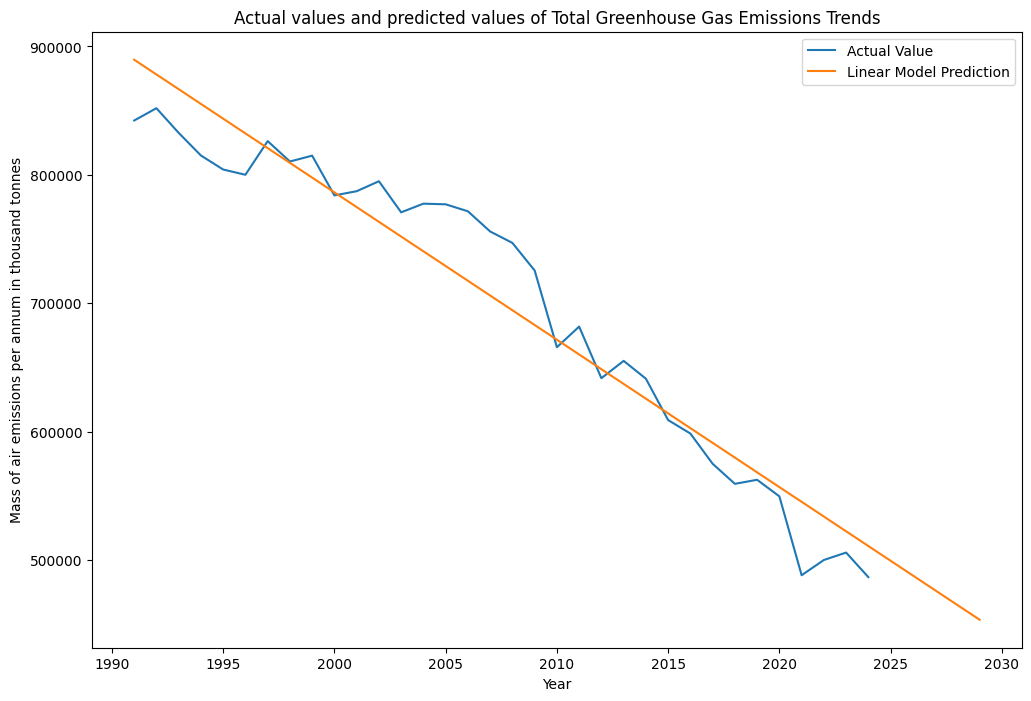

In [10]:
# Ploting Actual values and predicted values of Total Greenhouse Gas Emissions Trends
fig, ax = plt.subplots(figsize=(12,8))

ax.plot(data.index, data['Total greenhouse gas emissions'], label="Actual Value")
ax.plot(plot_data["Date"], plot_data['Total greenhouse gas emissions'], label="Linear Model Prediction")

ax.set_title("Actual values and predicted values of Total Greenhouse Gas Emissions Trends")
ax.set_xlabel("Year")
ax.set_ylabel("Mass of air emissions per annum in thousand tonnes")
ax.legend()

fig.savefig("GHG_emissions.png")
plt.show()